### Module 3 Learning: Machine Learning using Linear Regression
In this activity, we are going to again fit a linear model to a set of data, but we are going to do it as a machine learning method.  This is to show you that prediction using machine learning is very similar to statistical prediction using linear regression.<P>
    
We will call this a machine learning method to fit a linear model:<P>
1. Obtain and isolate the data
2. Split the data into training & test datasets
3. Format the data for the algorithm
4. Create the model and train it
5. Use the test set to measure the model's performance
6.  Use the model to make new predictions


In [2]:
from sklearn import datasets, linear_model # Both the data & the linear model
from sklearn.metrics import mean_squared_error, r2_score # Some metrics
import pandas as pd # Used to store data in a DataFrame
import numpy as np # We will use the np linear model
import matplotlib.pyplot as plt # Visualization module
%matplotlib inline

### 1. Obtain and isolate the data

In [3]:
# Same process as before
data = datasets.load_linnerud()
df = pd.DataFrame(data=data.target, columns=data.target_names)
print('Size of data (Rows,Cols):',df.shape)
df.head(4) # Show just the first 4

Size of data (Rows,Cols): (20, 3)


,Weight,Waist,Pulse
0,191.0,36.0,50.0
1,189.0,37.0,52.0
2,193.0,38.0,58.0
3,162.0,35.0,62.0


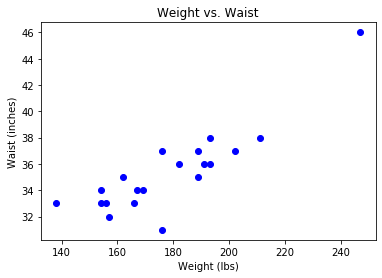

In [4]:
# Isolate two columns
X = df['Weight'] # We'll call this our independent variable. It is a pandas Series datatype.
y = df['Waist'] # This will be our dependent variable
# Plot the data using the matplotlib library
plt.scatter(X, y, c ="blue")
plt.title("Weight vs. Waist")
plt.xlabel("Weight (lbs)")
plt.ylabel("Waist (inches)")
plt.show()

### 2. Split the data into training and test sets
In machine learning, we spit our data into training and test sets. Once we train our model, then we use the test set to evaluate how well our model performs. This is a very common method.<P>
    
In this example, we have only 20 rows of data, which is much too few, but we'll get the idea.<P>
    
Let's put 15 rows (75%) in the training set and leave 5 rows (25%) to evaluate how good the model is performing.

In [5]:
# Split the data into training/testing sets
X_train = X[:-5] # Exclude the last 5 rows (15 rows of data)
X_test = X[-5:]  # Include the only the last 5 rows (5 rows of data)

# Split the targets into training/testing sets
y_train = y[:-5] # Exclude the last 5 rows
y_test = y[-5:] # Include the last 5 rows

### 3. Format the data for the algorithm
The sklearn.linear_model is expecting the data to be of the datatype 2-dimensional array. Currently, the data are all pandas Series datatype.<P>
    
We will convert the data into numpy arrays with 2 dimensions

In [6]:
# Prepare the data for the sklearn.linear_model()
X_train = X_train.values.reshape(-1,1) # undetermined # of rows, 1-column
X_test = X_test.values.reshape(-1,1)
y_train = y_train.values.reshape(-1,1)
y_test = y_test.values.reshape(-1,1)

In [7]:
print("Now the type is {} and the dimensions of the arrays are {}".format(type(y_test),y_test.ndim))
print("The shape of the y_test array is {} [rows, columns]".format(y_test.shape))
print("The values of the y_test array are: \n {}".format(y_test))

Now the type is <class 'numpy.ndarray'> and the dimensions of the arrays are 2
The shape of the y_test array is (5, 1) [rows, columns]
The values of the y_test array are: 
 [[37.]
 [37.]
 [32.]
 [33.]
 [33.]]


### 4. Create the model and train it

In [8]:
# Create linear regression object
model = linear_model.LinearRegression()
#
# Train the model using the training sets
model.fit(X_train, y_train)
#
print('The linear model has equation of:')
print('y = ',model.coef_.item(0),'* x + ',model.intercept_.item(0)) # slope/intercept

The linear model has equation of:
y =  0.1263838092270349 * x +  12.62194741934955


### 5. Use the test dataset to measure the model's performance

In [9]:
# Make predictions of waist size using weights from the test dataset
y_pred = model.predict(X_test)
# Now, use the waist size prediction and the true waist size to see how well our model does
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

Coefficient of determination: 0.35


### 6. Use the model to make new predictions

In [10]:
# Use the model to predict my waist size
myWeight = np.array(210).reshape(-1,1) # 1 row, 1 column, 2d array
myWaist = model.predict(myWeight)
print("My predicted waist is {} while my actual waist is 36.0 for an error of: {} inches."\
      .format(myWaist.item(0), myWaist.item(0) - 36))

My predicted waist is 39.16254735702688 while my actual waist is 36.0 for an error of: 3.162547357026881 inches.


### Plot the test data and the prediction linear model

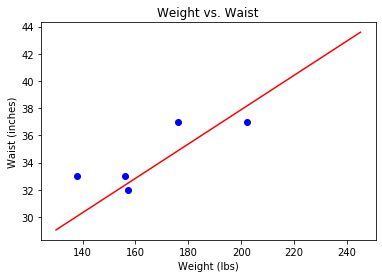

In [11]:
# Plot the just test data 
plt.scatter(X_test, y_test, c ="blue")
# Create a list of integers to on the x-axis
x_nums = np.arange(130,250,5).reshape(-1,1) # Integers between low and high, as a 2d array
# From each of those integers, predict the y-axis value using the linear model prediction
y_nums = model.predict(x_nums) # Predicted values for each of these
plt.plot(x_nums,y_nums, c = 'red') # Predicted linear line
plt.title("Weight vs. Waist")
plt.xlabel("Weight (lbs)")
plt.ylabel("Waist (inches)")
plt.show()